In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

import numpy as np
import os,cv2

In [2]:
def plot_gallery (images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8* n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row*n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [3]:
dir_name= "faces"
y=[];X=[];target_names=[]
person_id=0;h=w=300
n_samples=0
class_names=[]
for person_name in os.listdir(dir_name):
    # print(person_name)
    dir_path = dir_name+"/"+person_name+"/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        # formulate the image path
        image_path = dir_path+image_name
        # Read the input image
        img = cv2.imread(image_path)
        # Convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # resize image to 300*300 dimension
        resized_image= cv2.resize(gray,(h,w))
        # convert matrix to vector
        v = resized_image.flatten()
        X.append(v)
        # increase the number of samples
        n_samples =n_samples+1
        # Addinng th categorical label
        y.append(person_id)
        # adding the person name
        target_names.append(person_name)
    # Increase the person id by 1
    person_id=person_id+1
    
# ##########################################################################################
#transform List to numpy array
y=np.array(y)
X=np.array(X)
target_names =np.array(target_names)
n_features = X.shape[1]
print(y.shape, X. shape, target_names.shape)
print("Number of sampels:",n_samples)

(394,) (394, 90000) (394,)
Number of sampels: 394


In [4]:
# Download the data, if not already on disk and load it as numpy arrays
#Lfw_people = fetch_Lfw_people(min_faces_per_person=70, resize=0.4)
## introspect the images arrays to find the shapes (for plotting)
#n_samples, h, w = lfw_people.images.shape
#print(n_samples, h, w)
## for machine Learning we use the 2 data directly fos relative pixel
## positions info is ignored by this model)
#XLfw_people.data
#n_features = X.shape[1]
#print(X. shape)
## the label to predict is the id of the person
#y = Lfw_people. target
# print(y)
# if 0 in y:
#     print("yes")
#target_names = Lfw_people.target_names
#print(target_names)

n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 394
n_features: 90000
n_classes: 394


Extracting the top 150 eigenfaces from 295 faces


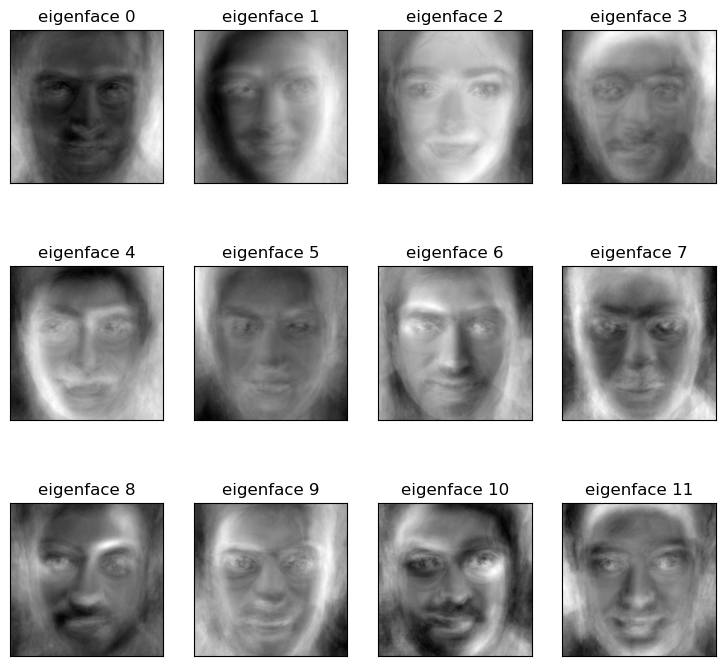

In [5]:
# #############################################################

#Split into a training set and a test set using a stratified k fold
#split into a training and testing set

X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.25, random_state=42)

# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
#dataset): unsupervised feature extraction / dimensionality reduction 
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"% (n_components, X_train.shape[0]))

# Applying PCA 
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

# Generating eigenfaces 
eigenfaces=pca.components_.reshape((n_components, h, w))

#plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])] 
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [15]:
print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

#%%Compute Fisherface
lda = LinearDiscriminantAnalysis()

#Compute LDA of reduced data 
lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print("Project done...")

Projecting the input data on the eigenfaces orthonormal basis
(295, 150) (99, 150)
Project done...


In [17]:
# Training with Multi layer perceptron

clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10),max_iter=1000, verbose=True).fit(X_train_lda, y_train)
print("Model Weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 2.23992534
Iteration 2, loss = 2.20963524
Iteration 3, loss = 2.18097214
Iteration 4, loss = 2.15230354
Iteration 5, loss = 2.12634038
Iteration 6, loss = 2.09930644
Iteration 7, loss = 2.07391760
Iteration 8, loss = 2.04834310
Iteration 9, loss = 2.02451976
Iteration 10, loss = 2.00044836
Iteration 11, loss = 1.97794335
Iteration 12, loss = 1.95586984
Iteration 13, loss = 1.93368584
Iteration 14, loss = 1.91337615
Iteration 15, loss = 1.89225679
Iteration 16, loss = 1.87205567
Iteration 17, loss = 1.85206200
Iteration 18, loss = 1.83261108
Iteration 19, loss = 1.81337535
Iteration 20, loss = 1.79429333
Iteration 21, loss = 1.77556347
Iteration 22, loss = 1.75726354
Iteration 23, loss = 1.73925141
Iteration 24, loss = 1.72140939
Iteration 25, loss = 1.70353105
Iteration 26, loss = 1.68608949
Iteration 27, loss = 1.66840566
Iteration 28, loss = 1.65114522
Iteration 29, loss = 1.63403549
Iteration 30, loss = 1.61669260
Iteration 31, loss = 1.59952257
Iteration 32, los

Iteration 303, loss = 0.04031460
Iteration 304, loss = 0.04003226
Iteration 305, loss = 0.03975703
Iteration 306, loss = 0.03945956
Iteration 307, loss = 0.03917853
Iteration 308, loss = 0.03889602
Iteration 309, loss = 0.03862590
Iteration 310, loss = 0.03834087
Iteration 311, loss = 0.03808108
Iteration 312, loss = 0.03783136
Iteration 313, loss = 0.03755558
Iteration 314, loss = 0.03727318
Iteration 315, loss = 0.03702809
Iteration 316, loss = 0.03677103
Iteration 317, loss = 0.03650028
Iteration 318, loss = 0.03625430
Iteration 319, loss = 0.03599037
Iteration 320, loss = 0.03574177
Iteration 321, loss = 0.03549423
Iteration 322, loss = 0.03526024
Iteration 323, loss = 0.03501373
Iteration 324, loss = 0.03477720
Iteration 325, loss = 0.03454584
Iteration 326, loss = 0.03431746
Iteration 327, loss = 0.03409246
Iteration 328, loss = 0.03384746
Iteration 329, loss = 0.03363473
Iteration 330, loss = 0.03340243
Iteration 331, loss = 0.03318843
Iteration 332, loss = 0.03297661
Iteration 

In [21]:
y_pred=[];y_prob=[]
for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    #print(prob, np.max(prob))
    class_id = np.where (prob == np.max(prob))[0][0]
    # print(class_index)
    # Find the Label of the mathed face
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

#Transform the data
y_pred = np.array(y_pred)

In [22]:
prediction_titles=[]
true_positive = 0

for i in range(y_pred.shape[0]):
    #print(y_test[i],y_pred[i])
    #true_name = target_names[y test[i]].rsplit(' ', 1)[-1]
    # pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i]) [0:3], true_name)
    #resutt = 'prediction: %s \ntrue:       %s' % (pred_name, true_name)
    prediction_titles.append(result)
    if true_name==pred_name:
        true_positive =true_positive+1

print("Accuracy:", true_positive*100/y_pred.shape[0])

Accuracy: 68.68686868686869


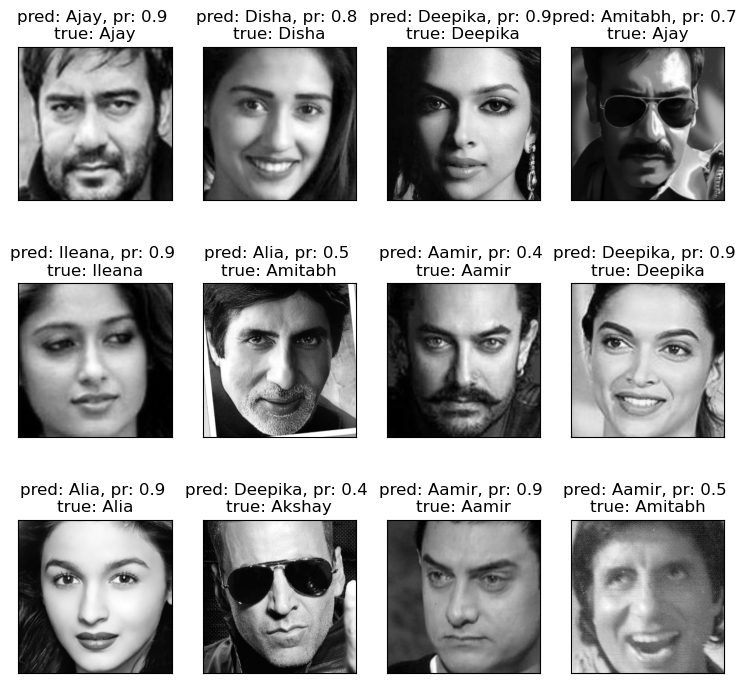

In [23]:
## Plot results
plot_gallery(X_test, prediction_titles, h, w)
plt.show()